## Accidents analysis

#### Contents:

Data preparation:

- Load accidents dataset
- Correctly encode NA's
- Create proper time column
- Map values in columns to meaningful ones
- Change columns names to meaningful ones

EDA:

- Check shapes, NA's
- Univariat analysis - plots etc.

#### Main takeaways

- There are 839 985 accidents in total
- Most accidents are during the day
- Most accidents are not on any intersection
- Accident count is dropping during the first years
- Location variables won't bring much, as these are usually NA's

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:

# vehicles = pd.read_csv('data/vehicles.csv', low_memory = False)
# places = pd.read_csv('data/places.csv', low_memory = False)
# users = pd.read_csv('data/users.csv', low_memory = False)

In [3]:
accidents = pd.read_csv('data/caracteristics.csv', low_memory = False, encoding = 'latin-1',
                       dtype= str)

In [4]:
accidents.dtypes

Num_Acc    object
an         object
mois       object
jour       object
hrmn       object
lum        object
agg        object
int        object
atm        object
col        object
com        object
adr        object
gps        object
lat        object
long       object
dep        object
dtype: object

In [5]:
accidents.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201600000001,16,2,1,1445,1,2,1,8,3,5,"46, rue Sonneville",M,0,0,590
1,201600000002,16,3,16,1800,1,2,6,1,6,5,1a rue du cimetière,M,0,0,590
2,201600000003,16,7,13,1900,1,1,1,1,6,11,NaN,M,0,0,590
3,201600000004,16,8,15,1930,2,2,1,7,3,477,52 rue victor hugo,M,0,0,590
4,201600000005,16,12,23,1100,1,2,3,1,3,11,rue Joliot curie,M,0,0,590


Column "agg" doesn't have description. NA's in categorical vars are encoded as "", while in numerical (lat, long) as 0. "" are converted by pandas, while 0's should be removed

In [6]:
print(len(accidents.query("an == '0'")))
print(len(accidents.query("mois == '0'")))
print(len(accidents.query("jour == '0'")))
print(len(accidents.query("hrmn == '0'")))
print(len(accidents.query("lat == '0'")))
print(len(accidents.query("long == '0'")))

0
0
0
0
117839
137657


So, for lat and long we have NA's. Converting to NA

In [7]:
accidents = accidents.replace({"lat": "0", "long": "0"}, np.nan)

Converting datetime cols to pandas format

In [8]:
datetime_cols = ["an", "mois", "jour", "hrmn"]

In [9]:
datetime_df = accidents[datetime_cols]

In [10]:
datetime_df["year"] = pd.to_numeric(datetime_df["an"]) + 2000
datetime_df["hour"] = datetime_df.hrmn.apply(lambda x: x[:2])
datetime_df["minute"] = datetime_df.hrmn.apply(lambda x: x[2:])
datetime_df = datetime_df.rename({"mois": "month", "an": "day"}, axis = 1)
datetime_df["datetime"] = pd.to_datetime(datetime_df[['year', 'month', 
                                                      'day', 'hour', 'minute']])

<ipython-input-10-c13e312ed9f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_df["year"] = pd.to_numeric(datetime_df["an"]) + 2000
<ipython-input-10-c13e312ed9f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datetime_df["hour"] = datetime_df.hrmn.apply(lambda x: x[:2])
<ipython-input-10-c13e312ed9f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [11]:
datetime_df.head(3)

,day,month,jour,hrmn,year,hour,minute,datetime
0,16,2,1,1445,2016,14,45,2016-02-16 14:45:00
1,16,3,16,1800,2016,18,00,2016-03-16 18:00:00
2,16,7,13,1900,2016,19,00,2016-07-16 19:00:00


Looks correct. Adding the column to the original dataframe

In [12]:
accidents["time"] = datetime_df["datetime"]

In [13]:
accidents = accidents.drop(datetime_cols, axis = 1)

In [14]:
accidents.head()

,Num_Acc,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,time
0,201600000001,1,2,1,8,3,5,"46, rue Sonneville",M,NaN,NaN,590,2016-02-16 14:45:00
1,201600000002,1,2,6,1,6,5,1a rue du cimetière,M,NaN,NaN,590,2016-03-16 18:00:00
2,201600000003,1,1,1,1,6,11,NaN,M,NaN,NaN,590,2016-07-16 19:00:00
3,201600000004,2,2,1,7,3,477,52 rue victor hugo,M,NaN,NaN,590,2016-08-16 19:30:00
4,201600000005,1,2,3,1,3,11,rue Joliot curie,M,NaN,NaN,590,2016-12-16 11:00:00


Now I'm mapping values of the columns to meaningful ones

In [15]:
accidents.columns

Index(['Num_Acc', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'adr', 'gps',
       'lat', 'long', 'dep', 'time'],
      dtype='object')

In [16]:
import mappings
# A file with dictionaries containing columns values mappings

In [17]:
accidents["lum"] = accidents["lum"].map(mappings.lum_map)
accidents["agg"] = accidents["agg"].map(mappings.agg_map)
accidents["int"] = accidents["int"].map(mappings.int_map)
accidents["atm"] = accidents["atm"].map(mappings.atm_map)
accidents["col"] = accidents["col"].map(mappings.col_map)
accidents["gps"] = accidents["gps"].map(mappings.gps_map)

In [18]:
accidents.head(3)

,Num_Acc,lum,agg,int,atm,col,com,adr,gps,lat,long,dep,time
0,201600000001,Full day,In built-up areas,Out of intersection,Cloudy weather,Two vehicles - by the side,5,"46, rue Sonneville",Métropole,NaN,NaN,590,2016-02-16 14:45:00
1,201600000002,Full day,In built-up areas,Giratory,Normal,Other collision,5,1a rue du cimetière,Métropole,NaN,NaN,590,2016-03-16 18:00:00
2,201600000003,Full day,Out of agglomeration,Out of intersection,Normal,Other collision,11,NaN,Métropole,NaN,NaN,590,2016-07-16 19:00:00


Changing columns names for readable in english

In [19]:
accidents.columns

Index(['Num_Acc', 'lum', 'agg', 'int', 'atm', 'col', 'com', 'adr', 'gps',
       'lat', 'long', 'dep', 'time'],
      dtype='object')

In [20]:
colnames_map = {
    "Num_Acc": "accident_id",
    "lum": "lighting",
    "agg": "localization",
    "int": "intersection_type",
    "atm": "weather",
    "col": "collision_type",
    "adr": "address",
    "dep": "departament"
               }

In [21]:
accidents = accidents.rename(colnames_map, axis = 1)

#### EDA

In [22]:
accidents.head()

,accident_id,lighting,localization,intersection_type,weather,collision_type,com,address,gps,lat,long,departament,time
0,201600000001,Full day,In built-up areas,Out of intersection,Cloudy weather,Two vehicles - by the side,5,"46, rue Sonneville",Métropole,NaN,NaN,590,2016-02-16 14:45:00
1,201600000002,Full day,In built-up areas,Giratory,Normal,Other collision,5,1a rue du cimetière,Métropole,NaN,NaN,590,2016-03-16 18:00:00
2,201600000003,Full day,Out of agglomeration,Out of intersection,Normal,Other collision,11,NaN,Métropole,NaN,NaN,590,2016-07-16 19:00:00
3,201600000004,Twilight or dawn,In built-up areas,Out of intersection,Dazzling weather,Two vehicles - by the side,477,52 rue victor hugo,Métropole,NaN,NaN,590,2016-08-16 19:30:00
4,201600000005,Full day,In built-up areas,Intersection in T,Normal,Two vehicles - by the side,11,rue Joliot curie,Métropole,NaN,NaN,590,2016-12-16 11:00:00


In [23]:
accidents.shape

(839985, 13)

In [24]:
accidents.accident_id.nunique()

839985

Accident id is unique. Good.

Testing percentage number of NA's

In [25]:
accidents.isna().sum()/accidents.shape[0]*100

accident_id           0.000000
lighting              0.000000
localization          0.000000
intersection_type     0.012619
weather               0.006548
collision_type        0.001310
com                   0.000238
address              16.731489
gps                  56.403031
lat                  70.876623
long                 73.236427
departament           0.000000
time                  1.707173
dtype: float64

Localization variables (lat, long, gps) are mostly empty - there is no sense in using them, probably won't bring much to prediction

##### Time of accidents analysis

In [26]:
tmp = accidents
tmp["year"] = tmp.time.dt.year
tmp["month"] = tmp.time.dt.month
tmp["hour"] = tmp.time.dt.hour

In [27]:
sns.set()

Text(0.5, 1.0, 'Number of accidents by year')

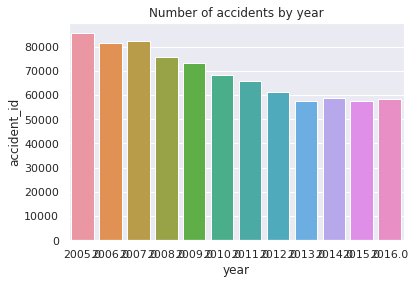

In [28]:
a = tmp.groupby("year").count().reset_index()
sns.barplot(x = "year", y = "accident_id", data = a).set_title("Number of accidents by year")

Number of accidents is lowering from 2005 to 2013, and then staying stable

Text(0.5, 1.0, 'Number of accidents by month')

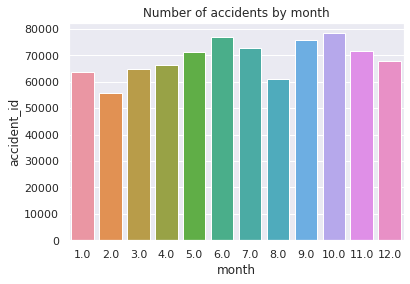

In [29]:
a = tmp.groupby("month").count().reset_index()
sns.barplot(x = "month", y = "accident_id", data = a).set_title("Number of accidents by month")

No visible trend when checking by month

Text(0.5, 1.0, 'Number of accidents by hour')

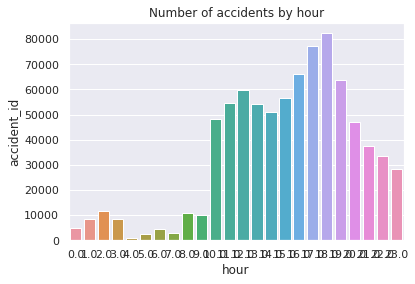

In [30]:
a = tmp.groupby("hour").count().reset_index()
sns.barplot(x = "hour", y = "accident_id", data = a).set_title("Number of accidents by hour")

From 0 a.m. to 9 a.m. there are very little accidents. During the day, there are peaks at 10 a.m. and the biggest one at 18 (6 p.m.)

##### Lightning

Text(0.5, 1.0, 'Type of lightting')

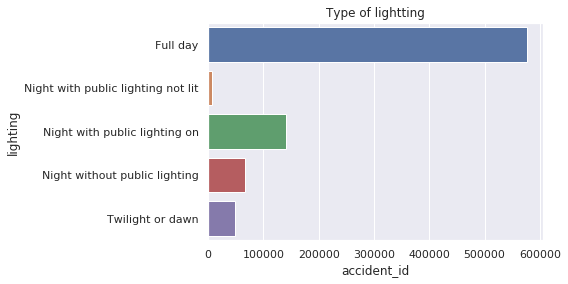

In [31]:
a = accidents.groupby("lighting").count().reset_index()
sns.barplot(x = "accident_id", y = "lighting", data = a).set_title("Type of lightting")

##### Localization

Text(0.5, 1.0, 'Type of localization')

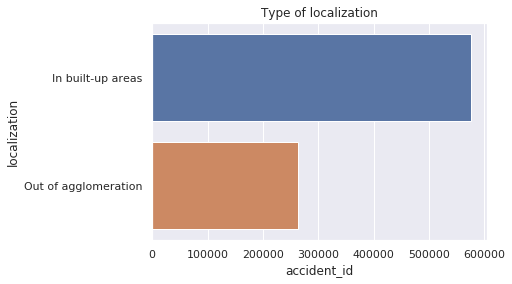

In [32]:
a = accidents.groupby("localization").count().reset_index()
sns.barplot(x = "accident_id", y = "localization", data = a).set_title("Type of localization")

##### Intersection type

Text(0.5, 1.0, 'Type of intersection')

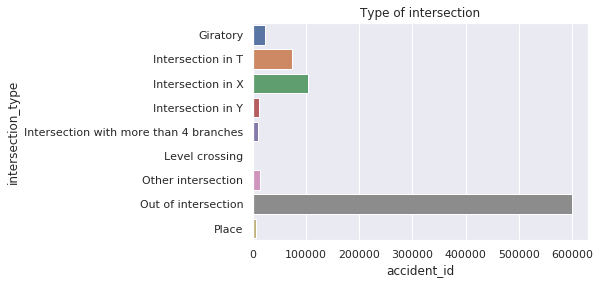

In [33]:
a = accidents.groupby("intersection_type").count().reset_index()
sns.barplot(x = "accident_id", y = "intersection_type", data = a).set_title("Type of intersection")

In [34]:
(accidents.groupby("intersection_type").count().accident_id)/accidents.accident_id.count()*100

intersection_type
Giratory                                   2.661714
Intersection in T                          8.782776
Intersection in X                         12.263076
Intersection in Y                          1.366810
Intersection with more than 4 branches     1.114782
Level crossing                             0.109526
Other intersection                         1.577052
Out of intersection                       71.388418
Place                                      0.723227
Name: accident_id, dtype: float64

~ 70% of accidents was not on any crossing. After adding X and T intersections, this accounts for 90% of accidents

##### Weather

Text(0.5, 1.0, 'Weather')

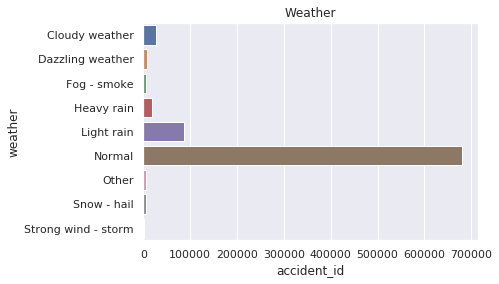

In [35]:
a = accidents.groupby("weather").count().reset_index()
sns.barplot(x = "accident_id", y = "weather", data = a).set_title("Weather")

~ 80% is in normal weather

##### Collision type

Text(0.5, 1.0, 'Collision type')

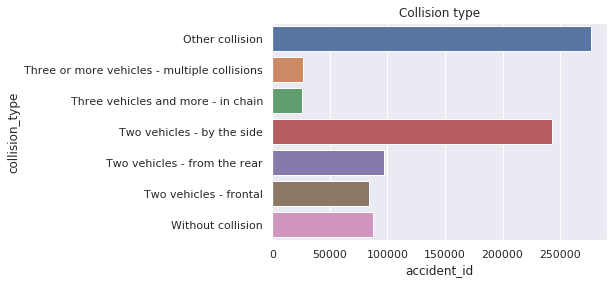

In [36]:
a = accidents.groupby("collision_type").count().reset_index()
sns.barplot(x = "accident_id", y = "collision_type", data = a).set_title("Collision type")

In [37]:
accidents.to_pickle('data/accidents_preprocessed.pkl')

# accidents = read_pickle('data/accidents_preprocessed.pkl')